# Assignment 2

Adam McDaniel, Elias Kokkas, and Gaddy Morales

## Collect Files And Setup for Spectrogram And Binning 

In [23]:
import os
import cv2
import librosa
import librosa.display
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

ROOT_DIR = './train'

WINDOW = None
TIME_BIN_COUNT = 6
FREQUENCY_BIN_COUNT = 6
BIN_SHAPE = (TIME_BIN_COUNT, FREQUENCY_BIN_COUNT)

def load_a_wav(wav_path: str, time_bin_count: int = TIME_BIN_COUNT, freq_bin_count: int = FREQUENCY_BIN_COUNT, window=None, fft_size: int = None) -> np.ndarray:
    '''
    Bins a wave file into a 2D vector of shape (freq_bin_count, time_bin_count).
    '''
    # Get the samples and the sampling rate of the wav file
    samples, sampling_rate = librosa.load(wav_path, sr=None, mono=True, offset=0.0, duration=20)

    
    return samples, sampling_rate

def spec_a_wav(wav_path: str, time_bin_count: int = TIME_BIN_COUNT, freq_bin_count: int = FREQUENCY_BIN_COUNT, window=None, fft_size: int = None) -> np.ndarray:
    '''
    Bins a wave file into a 2D vector of shape (freq_bin_count, time_bin_count).
    '''
    # Get the samples and the sampling rate of the wav file
    samples, sampling_rate = librosa.load(wav_path, sr=None, mono=True, offset=0.0, duration=30)

    if not fft_size:
        fft_size = 4096

    # Get the frequency, time, and spectrogram of the wav file
    f, t, pxx = signal.spectrogram(
        samples,
        nperseg=fft_size,
        fs=1 / sampling_rate,
        noverlap=fft_size/2,
        **{} if window is None else dict(window=window)
    )
    data = np.log10(pxx[:,:])
    
    return data

def bin_a_wav(wav_path: str, time_bin_count: int = TIME_BIN_COUNT, freq_bin_count: int = FREQUENCY_BIN_COUNT, window=None, fft_size: int = None) -> np.ndarray:
    '''
    Bins a wave file into a 2D vector of shape (freq_bin_count, time_bin_count).
    '''
    # Get the samples and the sampling rate of the wav file
    samples, sampling_rate = librosa.load(wav_path, sr=None, mono=True, offset=0.0, duration=30)

    if not fft_size:
        fft_size = 4096

    # Get the frequency, time, and spectrogram of the wav file
    f, t, pxx = signal.spectrogram(
        samples,
        nperseg=fft_size,
        fs=1 / sampling_rate,
        noverlap=fft_size/2,
        **{} if window is None else dict(window=window)
    )
    # Resize the spectrogram to the desired shape (time_bin_count, freq_bin_count)
    data = np.log10(cv2.resize(pxx[:,:], (time_bin_count, freq_bin_count)))
    return data

# Get the list of all the wav files for each class
music_files      = [f'{ROOT_DIR}/music/{f}' for f in os.listdir(f'{ROOT_DIR}/music')[:20]]
print('Collected music files')
vacuum_files     = [f'{ROOT_DIR}/vacuum/{f}' for f in os.listdir(f'{ROOT_DIR}/vacuum')[:20]]
print('Collected vacuum files')
blender_files    = [f'{ROOT_DIR}/blender/{f}' for f in os.listdir(f'{ROOT_DIR}/blender')[:20]]
print('Collected blender files')
silence_files    = [f'{ROOT_DIR}/silence/{f}' for f in os.listdir(f'{ROOT_DIR}/silence')[:20]]
print('Collected silence files')
microwave_files  = [f'{ROOT_DIR}/microwave/{f}' for f in os.listdir(f'{ROOT_DIR}/microwave')[:20]]
print('Collected microwave files')
fire_alarm_files = [f'{ROOT_DIR}/fire alarm/{f}' for f in os.listdir(f'{ROOT_DIR}/fire alarm')[:20]]
print('Collected fire alarm files')

print('Done👍')

Collected music files
Collected vacuum files
Collected blender files
Collected silence files
Collected microwave files
Collected fire alarm files
Done👍


## Load the  wav files

In [24]:
# Load the wav files
music_load      = [load_a_wav(f) for f in music_files]
print('Spectrogram for music files')
vacuum_load   = [load_a_wav(f) for f in vacuum_files]
print('Spectrogram for vacuum files')
blender_load   = [load_a_wav(f) for f in blender_files]
print('Spectrogram for blender files')
silence_load    = [load_a_wav(f) for f in silence_files]
print('Spectrogram for silence files')
microwave_load  = [load_a_wav(f) for f in microwave_files]
print('Spectrogram for microwave files')
fire_alarm_load = [load_a_wav(f) for f in fire_alarm_files]
print('Spectrogram for fire alarm files')

Spectrogram for music files
Spectrogram for vacuum files
Spectrogram for blender files
Spectrogram for silence files
Spectrogram for microwave files
Spectrogram for fire alarm files


## Spectrogram the  wav files

In [3]:
# Spec the wav files
music_spec      = [spec_a_wav(f) for f in music_files]
print('Spectrogram for music files')
vacuum_spec   = [spec_a_wav(f) for f in vacuum_files]
print('Spectrogram for vacuum files')
blender_spec   = [spec_a_wav(f) for f in blender_files]
print('Spectrogram for blender files')
silence_spec    = [spec_a_wav(f) for f in silence_files]
print('Spectrogram for silence files')
microwave_spec  = [spec_a_wav(f) for f in microwave_files]
print('Spectrogram for microwave files')
fire_alarm_spec = [spec_a_wav(f) for f in fire_alarm_files]
print('Spectrogram for fire alarm files')

Spectrogram for music files
Spectrogram for vacuum files


C:\Users\ikokk\AppData\Local\Temp\ipykernel_11372\3026394369.py:44: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(pxx[:,:])


Spectrogram for blender files
Spectrogram for silence files
Spectrogram for microwave files
Spectrogram for fire alarm files


### RANDOM STUFF (DELETE LATER)

In [4]:
print(type(music_load)) # list of all music files
print(type(music_load[0])) # the first music file is a tuple of (the audio signal= samples(ndarray), the sampling)
print(type(music_load[0][0])) # the audio signal of the first music file
print(type(music_load[0][1])) # the sampling rate of the first music file

<class 'list'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'int'>


In [5]:
print(music_load[0][0].shape)
print(music_load[0][1])

(1440000,)
48000


In [6]:
print(type(music_spec)) # list of all spectrogramed music files
print(type(music_spec[0])) # the log10 scale amplitude of the first spectrogramed music file

<class 'list'>
<class 'numpy.ndarray'>


In [7]:
print(music_spec[0].shape) # the first spectrogramed music file gives a 2049x718 matrix for log10(ampl) ** (Each has dif dim)


(2049, 702)


## Graph for Audio Signal 

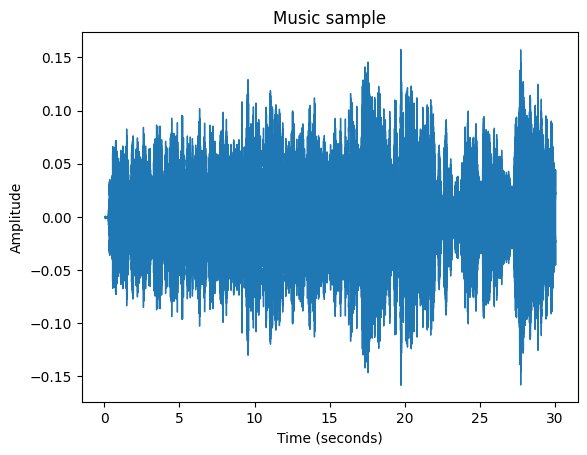

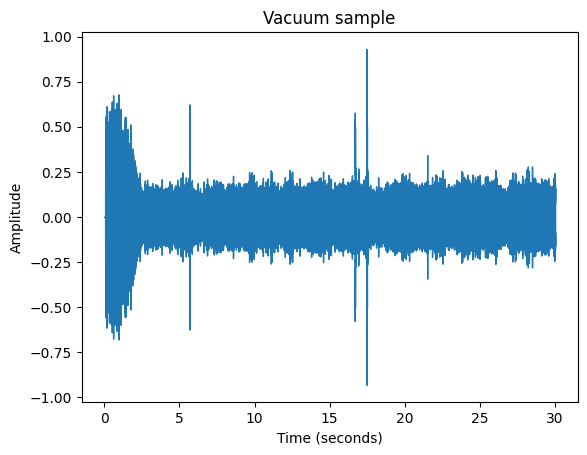

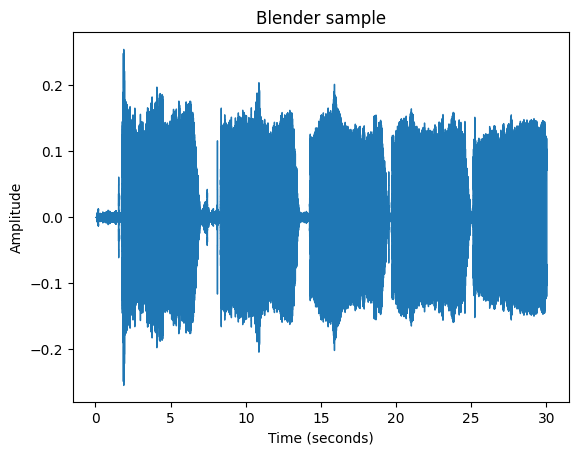

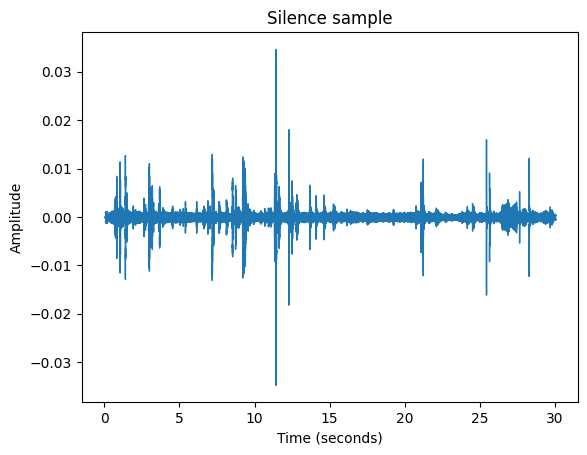

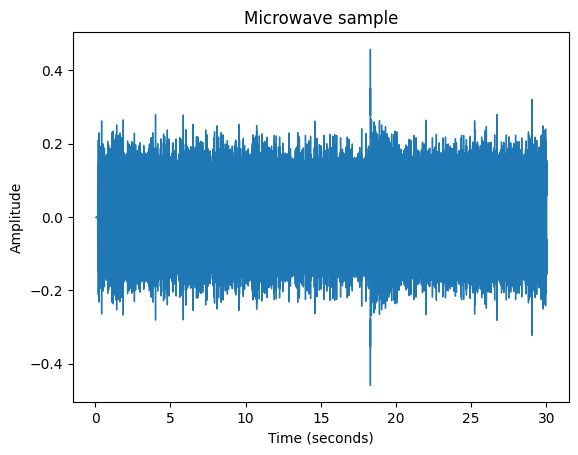

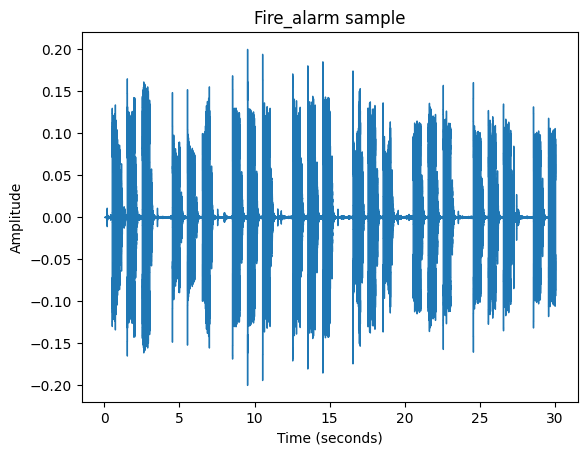

In [8]:
# Graph the audio signal of the first wav file in each class
plt.figure()
librosa.display.waveshow(music_load[0][0], sr=music_load[0][1])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Music sample")
plt.show()

plt.figure()
librosa.display.waveshow(vacuum_load[0][0], sr=vacuum_load[0][1])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Vacuum sample")
plt.show()

plt.figure()
librosa.display.waveshow(blender_load[0][0], sr=blender_load[0][1])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Blender sample")
plt.show()

plt.figure()
librosa.display.waveshow(silence_load[0][0], sr=silence_load[0][1])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Silence sample")
plt.show()

plt.figure()
librosa.display.waveshow(microwave_load[0][0], sr=microwave_load[0][1])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Microwave sample")
plt.show()

plt.figure()
librosa.display.waveshow(fire_alarm_load[0][0], sr=fire_alarm_load[0][1])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Fire_alarm sample")
plt.show()

## Graph for Spectrogram 

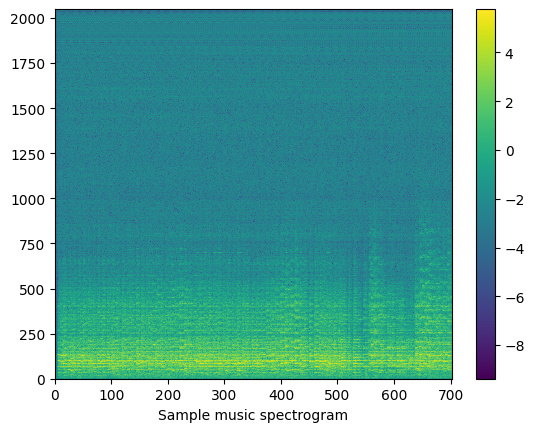

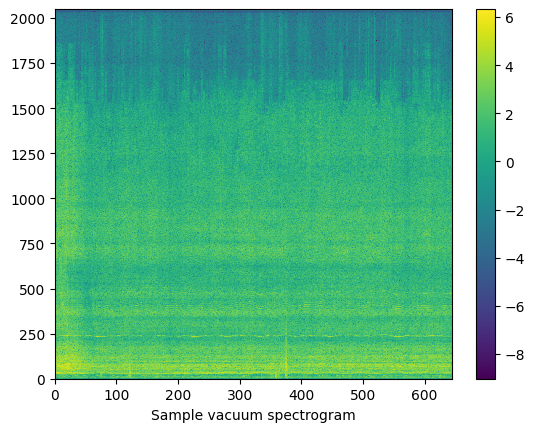

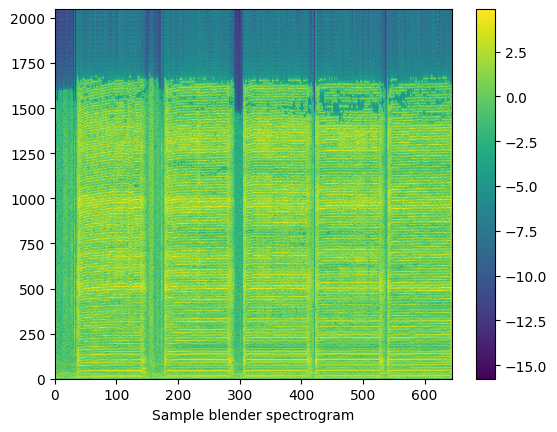

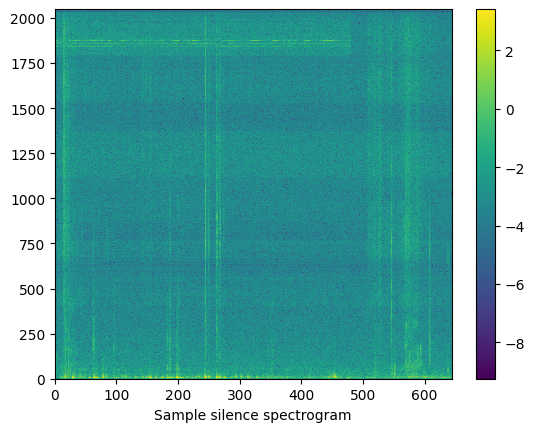

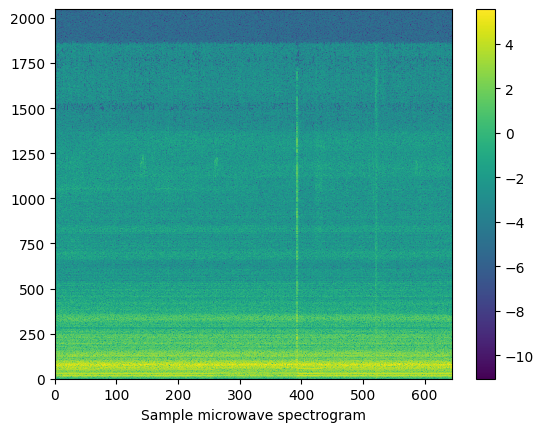

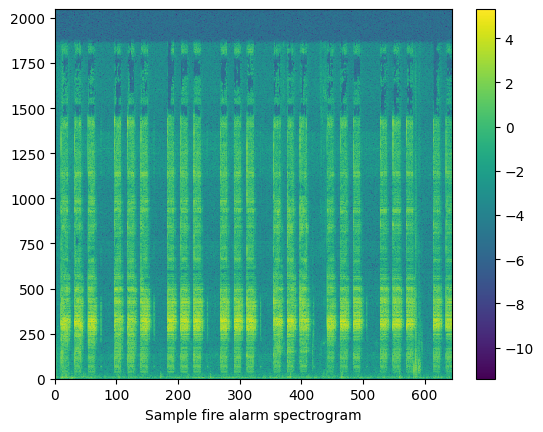

In [9]:
# Graph the spectrogram of the first wav file in each class
plt.xlabel("Sample music spectrogram")
plt.pcolormesh(music_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample vacuum spectrogram")
plt.pcolormesh(vacuum_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample blender spectrogram")
plt.pcolormesh(blender_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample silence spectrogram")
plt.pcolormesh(silence_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample microwave spectrogram")
plt.pcolormesh(microwave_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample fire alarm spectrogram")
plt.pcolormesh(fire_alarm_spec[0])
plt.colorbar()
plt.show()

## Bin The Data (Using Whole Recording as Window)

In [10]:
# Bin the wav files
music_bins      = [bin_a_wav(f) for f in music_files]
print('Binned music files')
vacuum_bins     = [bin_a_wav(f) for f in vacuum_files]
print('Binned vacuum files')
blender_bins    = [bin_a_wav(f) for f in blender_files]
print('Binned blender files')
silence_bins    = [bin_a_wav(f) for f in silence_files]
print('Binned silence files')
microwave_bins  = [bin_a_wav(f) for f in microwave_files]
print('Binned microwave files')
fire_alarm_bins = [bin_a_wav(f) for f in fire_alarm_files]
print('Binned fire alarm files')

# Confirm that the shape of the binned data is correct
assert len(music_bins) == 20, "music_bins shape is wrong, maybe you're missing music files?"
assert len(vacuum_bins) == 20, "vacuum_bins shape is wrong, maybe you're missing vacuum files?"
assert len(blender_bins) == 20, "blender_bins shape is wrong, maybe you're missing blender files?"
assert len(silence_bins) == 20, "silence_bins shape is wrong, maybe you're missing silence files?"
assert len(microwave_bins) == 20, "microwave_bins shape is wrong, maybe you're missing microwave files?"
assert len(fire_alarm_bins) == 20, "fire_alarm_bins shape is wrong, maybe you're missing fire alarm files?"

print('Done👍')

Binned music files
Binned vacuum files
Binned blender files
Binned silence files
Binned microwave files
Binned fire alarm files
Done👍


## Graph Binned Spectrograms

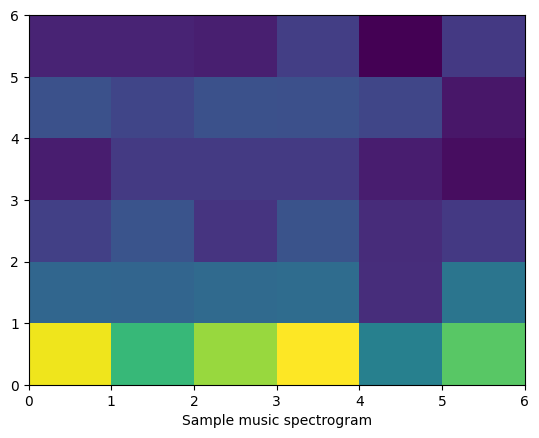

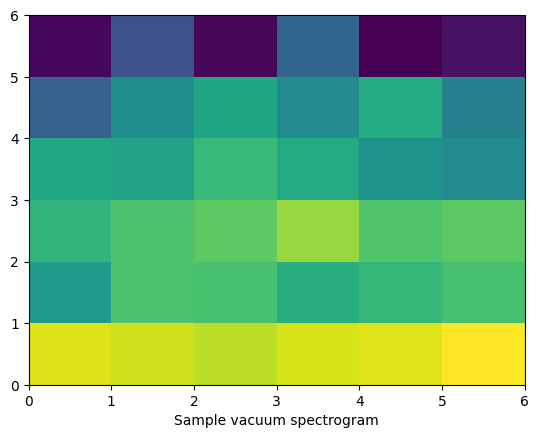

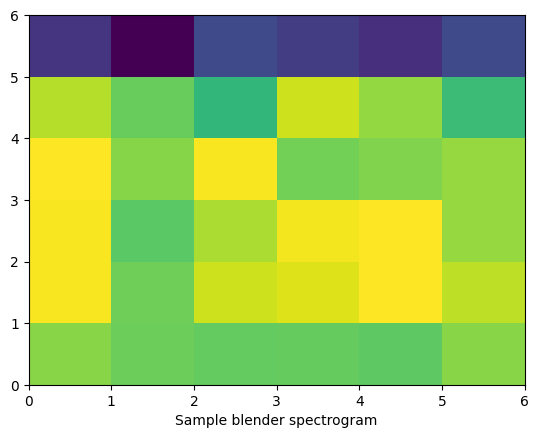

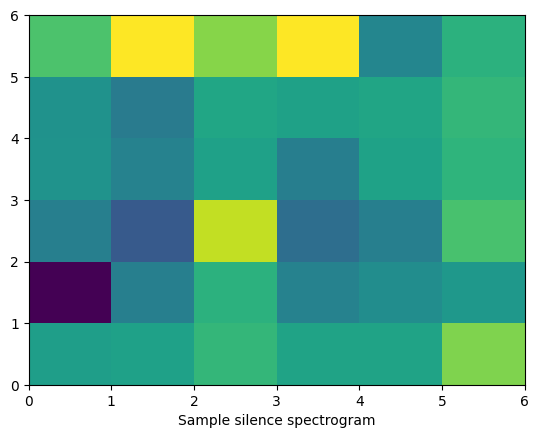

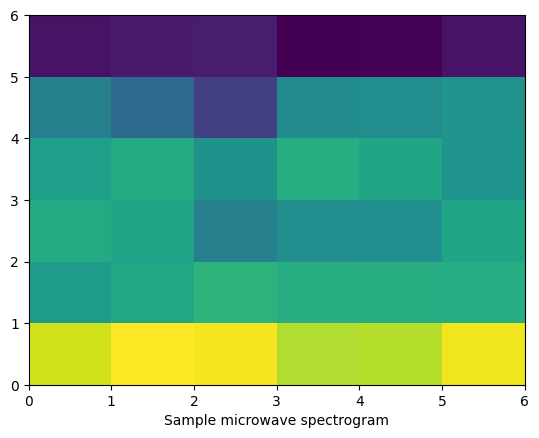

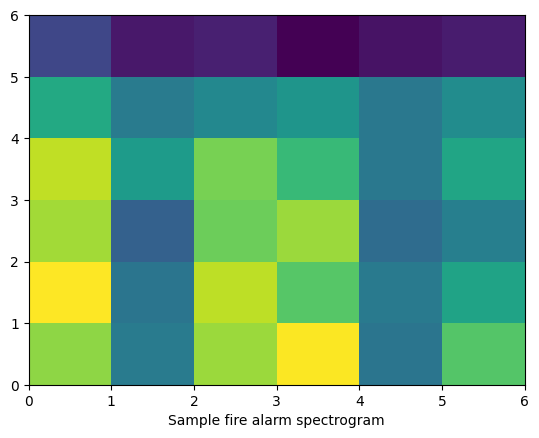

In [11]:
# Graph the spectrogram of the first wav file in each class
plt.xlabel("Sample music spectrogram")
plt.pcolormesh(music_bins[0])
plt.show()
plt.xlabel("Sample vacuum spectrogram")
plt.pcolormesh(vacuum_bins[0])
plt.show()
plt.xlabel("Sample blender spectrogram")
plt.pcolormesh(blender_bins[0])
plt.show()
plt.xlabel("Sample silence spectrogram")
plt.pcolormesh(silence_bins[0])
plt.show()
plt.xlabel("Sample microwave spectrogram")
plt.pcolormesh(microwave_bins[0])
plt.show()
plt.xlabel("Sample fire alarm spectrogram")
plt.pcolormesh(fire_alarm_bins[0])
plt.show()

### RANDOM STUFF (DELETE LATER)

In [12]:
print(len(music_spec))
print(music_spec[0].shape)

20
(2049, 702)


In [13]:
print(len(music_bins))
print(music_bins[0].shape)

20
(6, 6)


## Features from bins

To use the whole bin as the features, run the next code block and redefine `featurize` with the proper definition.

In [14]:
def featurize(bins: np.ndarray) -> np.ndarray:
    '''
    Flattens the 2D binned spectrogram into a "feature vector", which is just the contents of the bins.

    Using this definition satisfies the first approach to feature extraction in the assignment.
    '''
    return np.array([bins.flatten()])

print('Using featurization approach #2: each bin as a feature')
print('Done👍')

Using featurization approach #2: each bin as a feature
Done👍


## Create Training Data

In [15]:
# Featurize the binned data
# 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!! Select the featurization approach by running the appropriate definition above !!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# 

from sklearn.preprocessing import StandardScaler, normalize
import seaborn

music_features      = np.concatenate([featurize(b) for b in music_bins], axis=0)
print('Created music data')
vacuum_features     = np.concatenate([featurize(b) for b in vacuum_bins], axis=0)
print('Created vacuum data')
blender_features    = np.concatenate([featurize(b) for b in blender_bins], axis=0)
print('Created blender data')
silence_features    = np.concatenate([featurize(b) for b in silence_bins], axis=0)
print('Created silence data')
microwave_features  = np.concatenate([featurize(b) for b in microwave_bins], axis=0)
print('Created microwave data')
fire_alarm_features = np.concatenate([featurize(b) for b in fire_alarm_bins], axis=0)
print('Created fire alarm data')

features = (music_features, vacuum_features, blender_features, silence_features, microwave_features, fire_alarm_features)

# This is the data we will use to train our model
data = np.concatenate(features, axis=0)

print('Created training data')
print('Done👍')

Created music data
Created vacuum data
Created blender data
Created silence data
Created microwave data
Created fire alarm data
Created training data
Done👍


In [16]:
print(music_features[0].shape)
print(music_features.shape)
print(features[0].shape)
print(data.shape)

(36,)
(20, 36)
(20, 36)
(120, 36)


### Graph The Training Data

## Create Training Labels

In [17]:
# Assign labels to the classes
label_values = {
    'music': 0.0,
    'vacuum': 1.0,
    'blender': 2.0,
    'silence': 3.0,
    'microwave': 4.0,
    'fire alarm': 5.0,
}

# A convenient table to look up the label names from the label values
label_names = {
    0: 'music',
    1: 'vacuum',
    2: 'blender',
    3: 'silence',
    4: 'microwave',
    5: 'fire alarm',
}

#Assigning groundtruth conditions to each participant. 
music_labels      = [label_values['music']] * len(music_features)
print('Created music labels')
vacuum_labels     = [label_values['vacuum']] * len(vacuum_features)
print('Created vacuum labels')
blender_labels    = [label_values['blender']] * len(blender_features)
print('Created blender labels')
silence_labels    = [label_values['silence']] * len(silence_features)
print('Created silence labels')
microwave_labels  = [label_values['microwave']] * len(microwave_features)
print('Created microwave labels')
fire_alarm_labels = [label_values['fire alarm']] * len(fire_alarm_features)
print('Created fire alarm labels')

# This is the ground truth labels for the data
labels = np.concatenate((music_labels, vacuum_labels, blender_labels, silence_labels, microwave_labels, fire_alarm_labels), axis=0)

print('Done👍')

Created music labels
Created vacuum labels
Created blender labels
Created silence labels
Created microwave labels
Created fire alarm labels
Done👍


## Train and Test a Classifier

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, random_state=13, test_size=0.3)

# Create the model
clf = SVC(kernel='poly', degree=5, gamma='auto')
# Train the model
clf.fit(xtrain, ytrain)

# Score the cross-validation the model
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print('Average cross-validation score:', cv_scores.mean(), '\n')

# Get the predictions for the test set
ypred = clf.predict(xtest)

# Print a confusion matrix
cm = confusion_matrix(ytest, ypred)
print('Confusion Matrix:', cm, '\n', sep='\n')

# Print a classification report
cr = classification_report(ytest, ypred)
print('Test Statistics:', cr, '\n', sep='\n')

# How accurate was the model?
print('Testing Accuracy:', accuracy_score(ytest, ypred))
print('Done👍')

Average cross-validation score: 0.9055555555555556 

Confusion Matrix:
[[5 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 7 0 0 0]
 [0 0 0 7 0 0]
 [0 1 0 0 3 0]
 [0 0 0 0 1 5]]


Test Statistics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       0.88      1.00      0.93         7
         2.0       1.00      1.00      1.00         7
         3.0       1.00      1.00      1.00         7
         4.0       0.75      0.75      0.75         4
         5.0       1.00      0.83      0.91         6

    accuracy                           0.94        36
   macro avg       0.94      0.93      0.93        36
weighted avg       0.95      0.94      0.94        36



Testing Accuracy: 0.9444444444444444
Done👍


## Test Classifier on All Data

# Live Demo

In [ ]:
from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import Audio
camera = CameraStream(constraints={'audio': True, 'video': False})
recorder = AudioRecorder(stream=camera, filename='recording.mp3', autosave=True)
recorder

In [ ]:
recorder.save()
print('Recording saved')
!ffmpeg -i recording.mp3 -ac 1 -f wav livedemo.wav -y -hide_banner -loglevel panic
bins = bin_a_wav('livedemo.wav', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW)
plt.xlabel("Recorded spectrogram")
plt.pcolormesh(bins)
plt.show()
print('Prediction:', classify('livedemo.wav'))

## Extract Domain Specific Features

In [29]:
zcr = librosa.feature.zero_crossing_rate(vacuum_load[0][0])
print(zcr.shape)
print(np.mean(zcr, axis=1))
zcr2 = librosa.feature.zero_crossing_rate(blender_load[0][0])
print(np.mean(zcr2, axis=1))
print(blender_load[0][0].shape)

(1, 1723)
[0.11585557]
[0.30148292]
(882000,)


In [27]:
rms = librosa.feature.rms(y= vacuum_load[0][0])
print(rms.shape)
print(vacuum_spec[0].shape)

(1, 1723)
(2049, 644)


In [ ]:
sro = librosa.feature.spectral_rolloff(y= music_load[0][0], sr=music_load[0][1], n_fft=4096, hop_length=512, win_length=None, roll_percent=0.85)

print(sro.shape)

In [ ]:
def featurize():
    '''
    Featurizes a 2D binned spectrogram into a feature vector (by extracting domain specific features).

    Using this definition satisfies the second approach to feature extraction in the assignment.
    '''
    out = []
    
    for n in range(0, 19, 1):
        fv = []
        mzcr = librosa.feature.zero_crossing_rate(music_spec[n][3])
        print(len(mzcr[0]))
        #vzcr = librosa.feature.zero_crossing_rate(vacuum_spec[n][3])
        #bzcr = librosa.feature.zero_crossing_rate(blender_spec[n][3])
        #szcr = librosa.feature.zero_crossing_rate(silence_spec[n][3])
        #wzcr = librosa.feature.zero_crossing_rate(microwave_spec[n][3])
        #fzcr = librosa.feature.zero_crossing_rate(fire_alarm_spec[n][3])
        fv.append(len(mzcr[0]))
        
       
        
        
        out.append(fv)

    out = np.array(out)
    return out

print('Using featurization approach #1: extracting domain specific features')
print('Done👍')


In [ ]:
featurize()

# Now With Windowing!

## Bin The Data Using Windowing

In [ ]:
WINDOW = ('tukey', 0.5)
TIME_BIN_COUNT = 6
FREQUENCY_BIN_COUNT = 6
FFT_SIZE = 128

# Bin the wav files
windowed_music_bins      = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in music_files]
print('Binned windowed music files')
windowed_vacuum_bins     = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in vacuum_files]
print('Binned windowed vacuum files')
windowed_blender_bins    = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in blender_files]
print('Binned windowed blender files')
windowed_silence_bins    = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in silence_files]
print('Binned windowed silence files')
windowed_microwave_bins  = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in microwave_files]
print('Binned windowed microwave files')
windowed_fire_alarm_bins = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in fire_alarm_files]
print('Binned windowed fire alarm files')
print('Done👍')

## Graph Binned Spectrograms

In [ ]:
# Graph the spectrogram of the first wav file in each class
plt.xlabel("Sample windowed music spectrogram")
plt.pcolormesh(windowed_music_bins[0])
plt.show()
plt.xlabel("Sample windowed vacuum spectrogram")
plt.pcolormesh(windowed_vacuum_bins[0])
plt.show()
plt.xlabel("Sample windowed blender spectrogram")
plt.pcolormesh(windowed_blender_bins[0])
plt.show()
plt.xlabel("Sample windowed silence spectrogram")
plt.pcolormesh(windowed_silence_bins[0])
plt.show()
plt.xlabel("Sample windowed microwave spectrogram")
plt.pcolormesh(windowed_microwave_bins[0])
plt.show()
plt.xlabel("Sample windowed fire alarm spectrogram")
plt.pcolormesh(windowed_fire_alarm_bins[0])
plt.show()

## Create Training Data From Windowed Bins

In [ ]:
# Featurize the binned data
# 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!! Select the featurization approach by running the appropriate definition above !!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# 

windowed_music_features      = np.concatenate([featurize(b) for b in windowed_music_bins], axis=0)
print('Created windowed music features')
windowed_vacuum_features     = np.concatenate([featurize(b) for b in windowed_vacuum_bins], axis=0)
print('Created windowed vacuum features')
windowed_blender_features    = np.concatenate([featurize(b) for b in windowed_blender_bins], axis=0)
print('Created windowed blender features')
windowed_silence_features    = np.concatenate([featurize(b) for b in windowed_silence_bins], axis=0)
print('Created windowed silence features')
windowed_microwave_features  = np.concatenate([featurize(b) for b in windowed_microwave_bins], axis=0)
print('Created windowed microwave features')
windowed_fire_alarm_features = np.concatenate([featurize(b) for b in windowed_fire_alarm_bins], axis=0)
print('Created windowed fire alarm features')

windowed_features = (windowed_music_features, windowed_vacuum_features, windowed_blender_features, windowed_silence_features, windowed_microwave_features, windowed_fire_alarm_features)

# This is the data we will use to train our model
data = np.concatenate(windowed_features, axis=0)

print('Done👍')

### Graph The Windowed Training Data

In [ ]:
# Graph the features for each sample in each class
graph_features(windowed_features, ['music', 'vacuum', 'blender', 'silence', 'microwave', 'fire alarm'])

## Create Training Labels

In [ ]:

#Assigning groundtruth conditions to each participant. 
windowed_music_labels      = [label_values['music']] * len(windowed_music_features)
print('Created windowed music labels')
windowed_vacuum_labels     = [label_values['vacuum']] * len(windowed_vacuum_features)
print('Created windowed vacuum labels')
windowed_blender_labels    = [label_values['blender']] * len(windowed_blender_features)
print('Created windowed blender labels')
windowed_silence_labels    = [label_values['silence']] * len(windowed_silence_features)
print('Created windowed silence labels')
windowed_microwave_labels  = [label_values['microwave']] * len(windowed_microwave_features)
print('Created windowed microwave labels')
windowed_fire_alarm_labels = [label_values['fire alarm']] * len(windowed_fire_alarm_features)
print('Created windowed fire alarm labels')

# This is the ground truth labels for the data
labels = np.concatenate((
    windowed_music_labels,
    windowed_vacuum_labels,
    windowed_blender_labels,
    windowed_silence_labels,
    windowed_microwave_labels,
    windowed_fire_alarm_labels
), axis=0)

print('Done👍')

## Train and Test a Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.3)

# Create the model
clf = SVC(kernel='poly', degree=5, gamma='auto')
# Train the model
clf.fit(xtrain, ytrain)
# Score the cross-validation the model
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print('Average cross-validation score:', cv_scores.mean(), '\n')

# Get the predictions for the test set
ypred = clf.predict(xtest)

# Print a confusion matrix
cm = confusion_matrix(ytest, ypred)
print('Confusion Matrix:', cm, '\n', sep='\n')

# Print a classification report
cr = classification_report(ytest, ypred)
print('Test Statistics:', cr, '\n', sep='\n')

# How accurate was the model?
print('Testing Accuracy:', accuracy_score(ytest, ypred))
print('Done👍')

## Test Classifier On All Data

In [ ]:
print('Checking windowed music files...')
check_files(music_files, 'music', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed vacuum files...')
check_files(vacuum_files, 'vacuum', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed blender files...')
check_files(blender_files, 'blender', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed silence files...')
check_files(silence_files, 'silence', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed microwave files...')
check_files(microwave_files, 'microwave', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed fire alarm files...')
check_files(fire_alarm_files, 'fire alarm', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)

print('Done👍')

# Live Demo

In [ ]:
from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import Audio
camera = CameraStream(constraints={'audio': True, 'video': False})
recorder = AudioRecorder(stream=camera, filename='recording.mp3', autosave=True)
recorder

In [ ]:
!ffmpeg -i recording.mp3 -ac 1 -f wav livedemo.wav -y -hide_banner -loglevel panic
recorder.save()
print('Recording saved')
bins = bin_a_wav('livedemo.wav', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW)
plt.xlabel("Recorded spectrogram")
plt.pcolormesh(bins)
plt.show()
print('Prediction:', classify('livedemo.wav', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW))